# a) Use decision trees to prepare a model on fraud data
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check (1).csv


In [ ]:
fraud=pd.read_csv('Fraud_check.csv')

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 

In [ ]:
fraud['Marital.Status'].value_counts()

2    217
1    194
0    189
Name: Marital.Status, dtype: int64

In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [ ]:
fraud.insert(6,'tax_class'," ")

for i in range(0,len(fraud['Taxable.Income']),1):
    if fraud['Taxable.Income'].iloc[i]<=30000:
        fraud['tax_class'].iloc[i]='Risky'
    else:
        fraud['tax_class'].iloc[i]='Good'

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
0,NO,2,68833,50047,10,YES,Good
1,YES,0,33700,134075,18,YES,Good
2,NO,1,36925,160205,30,YES,Good
3,YES,2,50190,193264,15,YES,Good
4,NO,1,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES,Good
596,YES,0,69967,55369,2,YES,Good
597,NO,0,47334,154058,0,YES,Good
598,YES,1,98592,180083,17,NO,Good


In [ ]:
fraud.tax_class.value_counts()

Good     476
Risky    124
Name: tax_class, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['tax_class']= label_encoder.fit_transform(fraud['tax_class'])


In [ ]:
fraud.sample(8)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_class
5,0,0,33329,116382,0,0,0
190,0,2,73620,90459,19,0,0
477,1,0,57402,158849,29,0,0
29,1,0,94033,41863,30,1,0
277,0,0,63710,117364,11,0,0
425,1,0,79593,121506,27,0,0
430,1,1,98720,161215,8,0,0
585,0,2,84557,137622,2,1,0


In [ ]:
fraud.drop(['Taxable.Income'], axis=1, inplace=True)

In [ ]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_class
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [ ]:
#Splitting the data into featuers and labels
X = fraud.iloc[:,0:-1]
Y = fraud.iloc[:,5]

In [ ]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_class, Length: 600, dtype: int64

In [ ]:
Y.value_counts()

0    476
1    124
Name: tax_class, dtype: int64

In [ ]:
#from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33,random_state=40)

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

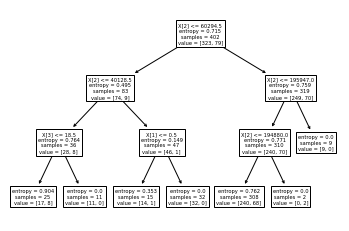

In [ ]:
#PLot the decision tree
tree.plot_tree(model);

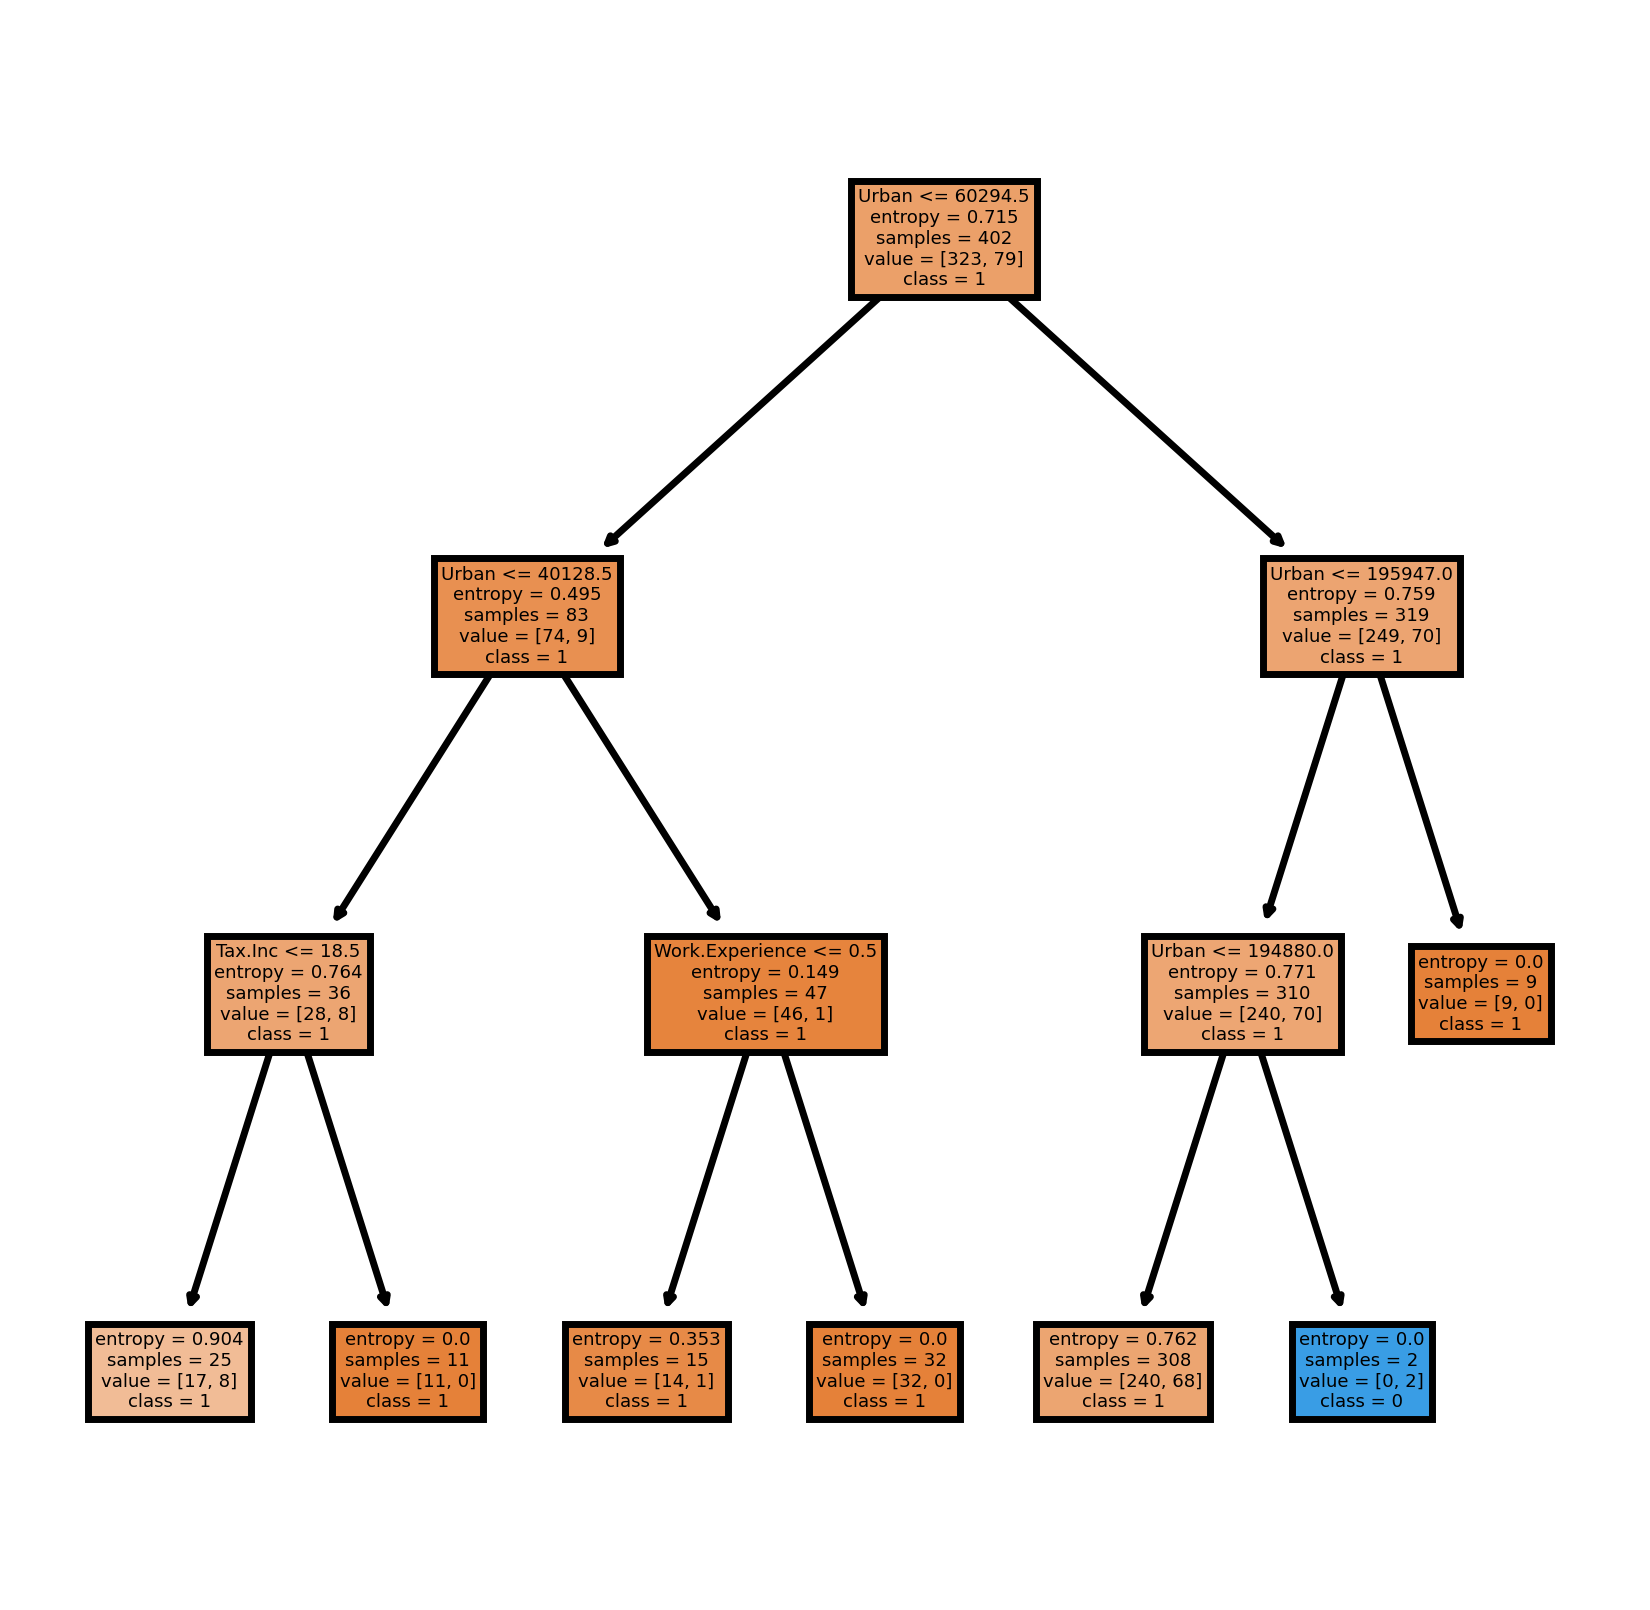

In [ ]:
fn=['City.Population',	'Work.Experience',	'Urban',	'Tax.Inc'] #.columns
cn=['1','0']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    197
1      1
dtype: int64

In [ ]:
Y_test.value_counts()

0    153
1     45
Name: tax_class, dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
pd.crosstab(Y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
tax_class,,
0,152,1
1,45,0


In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,preds)

0.7676767676767676

In [ ]:
np.mean(preds==Y_test)

0.7676767676767676

# Building Decision Tree Classifier (CART) using Gini Criteria


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=2)

In [ ]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(X_test)
np.mean(preds==Y_test)

0.7676767676767676

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = fraud.values
X = array[:,1:5]
y = array[:,5]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

-1.1303797468354433

# Company_Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
df=pd.read_csv('Company_Data.csv')

In [ ]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 

In [ ]:
df['ShelveLoc'].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
df['Urban'] = np.where(df['Urban'].str.contains("Yes"), 1, 0)
df['US'] = np.where(df['US'].str.contains("Yes"), 1, 0)
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [ ]:
x=df.iloc[:,0:6]
y=df['ShelveLoc']

In [ ]:
df['ShelveLoc'].unique()

array([0, 1, 2])

In [ ]:
df.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [ ]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [ ]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Building Decision Tree Classifier using Entropy Criteria

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

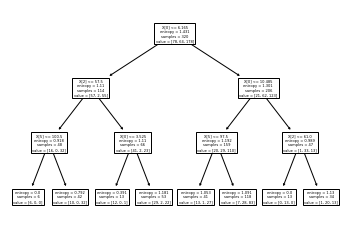

In [ ]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

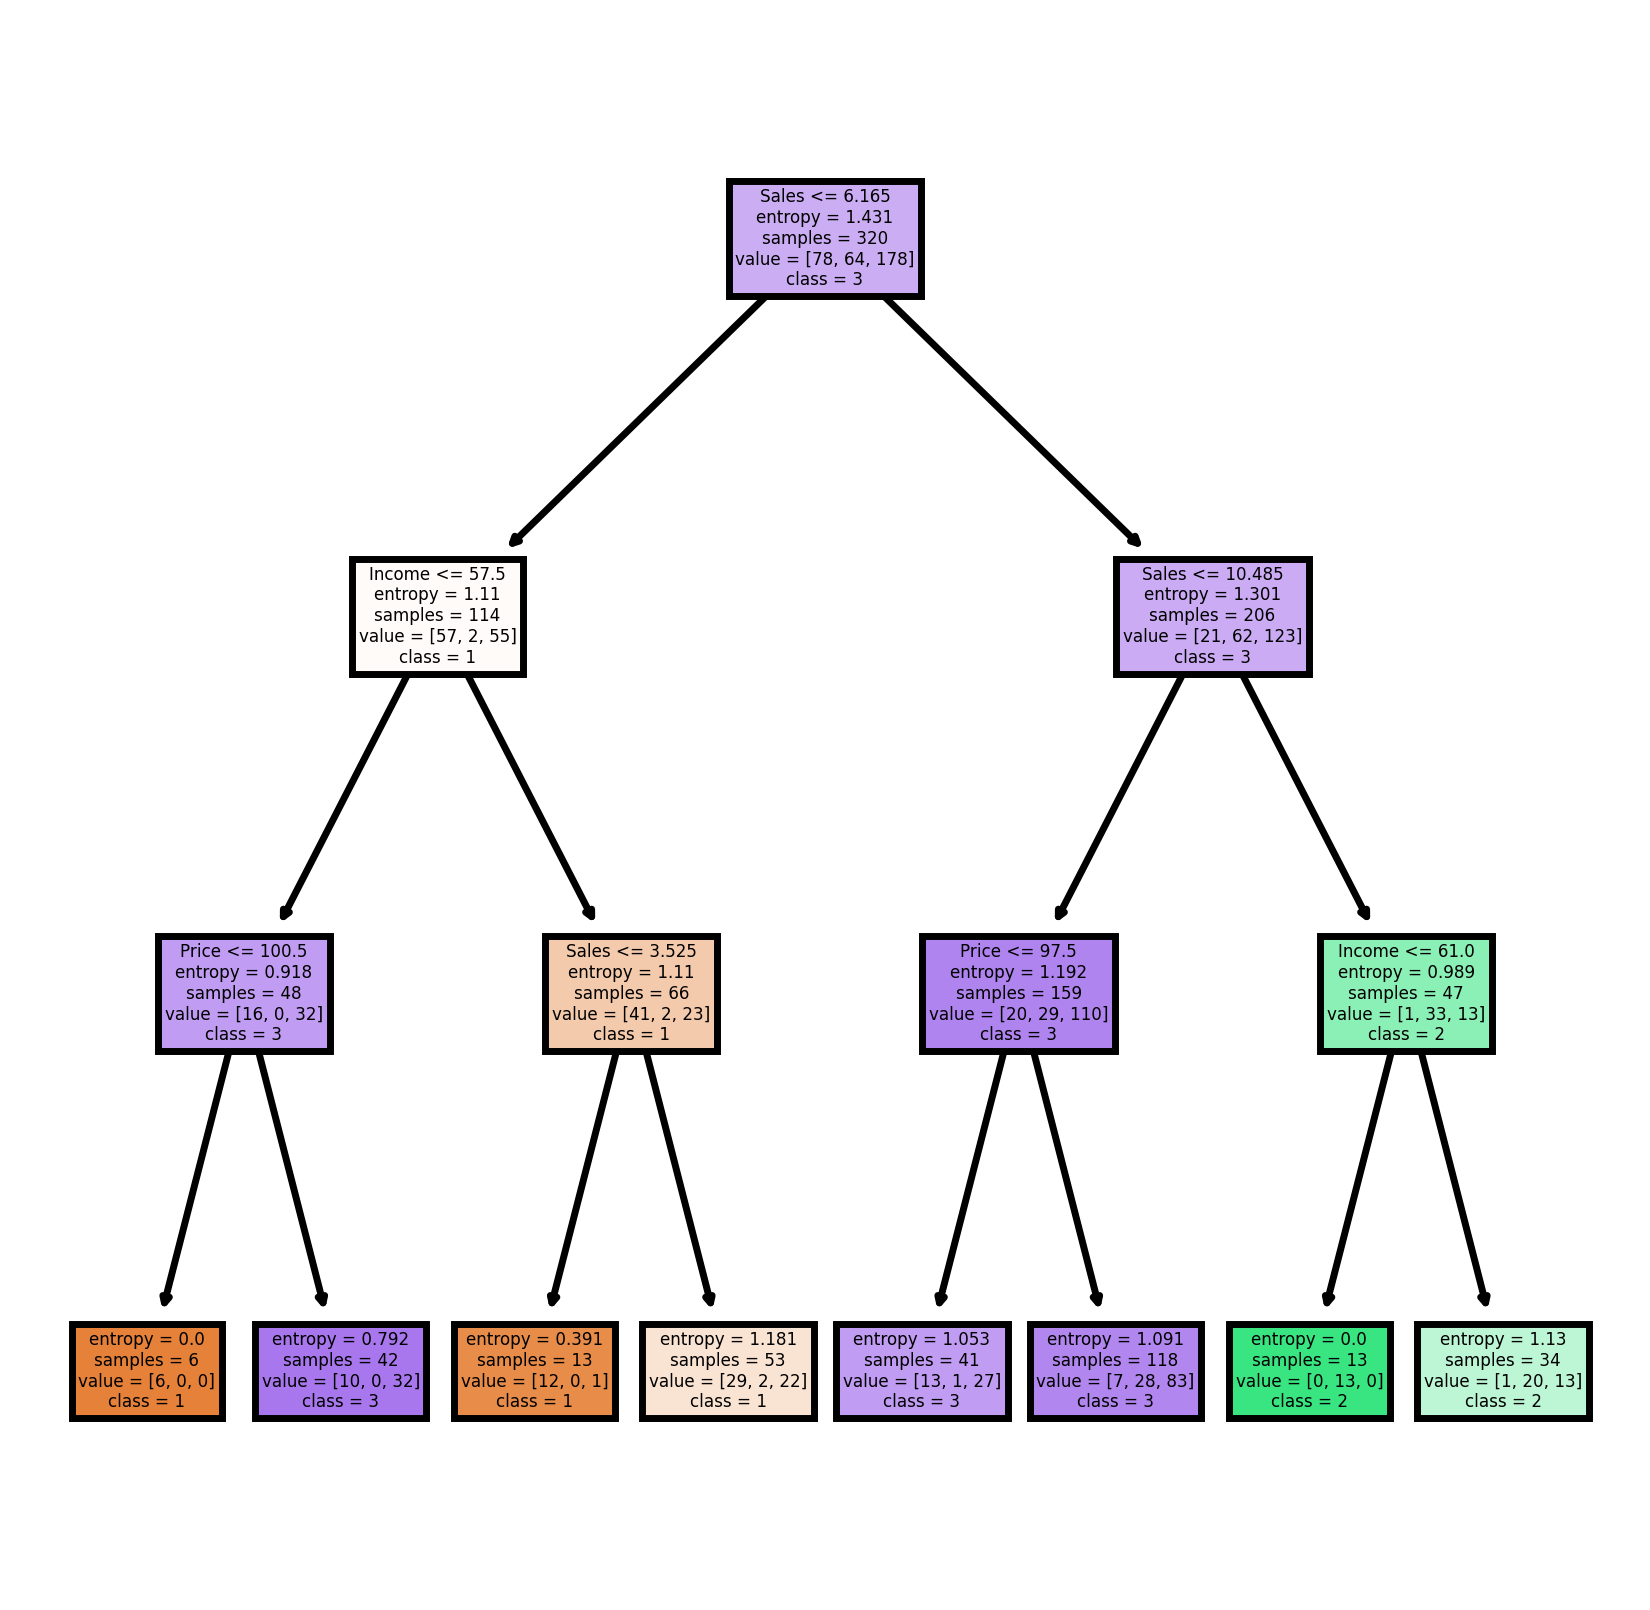

In [ ]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price'] #.columns
cn=['1', '2', '3']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    52
1    15
0    13
dtype: int64

In [ ]:
y_test.value_counts()

2    41
1    21
0    18
Name: ShelveLoc, dtype: int64

In [ ]:
preds

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1])

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,5,2,11
1,0,11,10
2,8,2,31


In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,preds)

0.5875

In [ ]:
np.mean(preds==y_test)

0.5875

# Building Decision Tree Classifier (CART) using Gini Criteria

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [ ]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5875

# Decision Tree Regression Example

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [ ]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Find the accuracy
model.score(X_test,y_test)

-1.248983770897644